<a href="https://colab.research.google.com/github/tamisha-dzifa/DSProject2/blob/master/Project_2_Data_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

### Suicide Rates

In [2]:
import os

if not os.path.exists('suicide-death-rates.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/suicide-death-rates.csv

--2020-11-17 19:44:15--  https://github.com/tamisha-dzifa/DSProject2/raw/master/suicide-death-rates.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/suicide-death-rates.csv [following]
--2020-11-17 19:44:15--  https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/suicide-death-rates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245130 (239K) [text/plain]
Saving to: ‘suicide-death-rates.csv’

suicide-death-rates 100%[===================>] 239.38K  --.-KB/s    in 0.04s   

2020-11-17 19:44:15 (6.65 MB/s) - ‘suicide-death-rates.csv’ saved [245130/2451

In [3]:
suicide = pd.read_csv('suicide-death-rates.csv')
suicide.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


Renaming the last column as `Suicide Rate`.

In [4]:
suicide.columns = ['Entity', 'Code', 'Year', 'Suicide Rate']
suicide.head()

,Entity,Code,Year,Suicide Rate
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


In [5]:
suicide.shape

(6468, 4)

In [6]:
suicide_entity = suicide['Entity']
suicide_entity.value_counts().sort_index()

Afghanistan                   28
Albania                       28
Algeria                       28
American Samoa                28
Andean Latin America          28
                              ..
Western Sub-Saharan Africa    28
World                         28
Yemen                         28
Zambia                        28
Zimbabwe                      28
Name: Entity, Length: 231, dtype: int64

In [7]:
suicide_entity.isna().sum()

0

In [8]:
suicide['Suicide Rate'].isna().sum()

0

There are no N/A values which is good.

In [9]:
s_rate = suicide['Suicide Rate']
s_rate.describe()

count    6468.000000
mean       12.068240
std         8.037739
min         1.526792
25%         6.741737
50%        10.668531
75%        14.742472
max        98.831696
Name: Suicide Rate, dtype: float64

In [10]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=dea2e099d1b9bd3e7f57d54ed9078ebaba3b4047c92208a2098ee6160a1eee9c
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [11]:
from empiricaldist import Pmf, Cdf
s_rate_cdf = Cdf.from_seq(s_rate)

In [12]:
import matplotlib.pyplot as plt

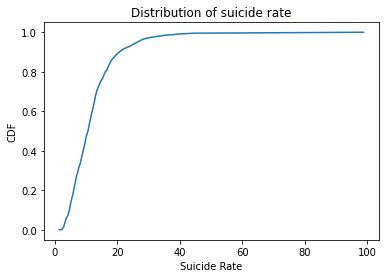

In [13]:
s_rate_cdf.plot()
plt.xlabel('Suicide Rate');
plt.ylabel('CDF');
plt.title('Distribution of suicide rate');

In [14]:
q = 30
p = s_rate_cdf(q)
p

array(0.97139765)

From the CDF above, we can say that from the suicide rates presented in the data, about 97% of countries have a suicide rate of 30% or lower.

### GDP Data

In [15]:
import os

if not os.path.exists('gdp-per-capita-worldbank.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/gdp-per-capita-worldbank.csv

--2020-11-17 19:46:16--  https://github.com/tamisha-dzifa/DSProject2/raw/master/gdp-per-capita-worldbank.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/gdp-per-capita-worldbank.csv [following]
--2020-11-17 19:46:17--  https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/gdp-per-capita-worldbank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242550 (237K) [text/plain]
Saving to: ‘gdp-per-capita-worldbank.csv’

gdp-per-capita-worl 100%[===================>] 236.87K  --.-KB/s    in 0.05s   

2020-11-17 19:46:17 (4.84 MB/s) - ‘gdp-per-capita-worldban

In [17]:
gdp = pd.read_csv('gdp-per-capita-worldbank.csv')
gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2011 international $)"
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


Renaming the last column as `GDP per capita`.

In [18]:
gdp.columns = ['Entity', 'Code', 'Year', 'GDP per capita']
gdp.head()

,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1063.635574
1,Afghanistan,AFG,2003,1099.194507
2,Afghanistan,AFG,2004,1062.249360
3,Afghanistan,AFG,2005,1136.123214
4,Afghanistan,AFG,2006,1161.124889


In [19]:
gdp.shape

(6407, 4)

In [20]:
gdp_entity = gdp['Entity']
gdp_entity.value_counts().sort_index()

Afghanistan            16
Albania                28
Algeria                28
Angola                 28
Antigua and Barbuda    28
                       ..
Vietnam                28
World                  28
Yemen                  27
Zambia                 28
Zimbabwe               28
Name: Entity, Length: 241, dtype: int64

Unlike in the suicide data where each of the enntities had the same number of entries, there are some missing values in this dataset for some countries.

In [21]:
gdp_entity.isna().sum()

0

In [22]:
gdp['GDP per capita'].isna().sum()

0

These 'missing' values don't show as N/A but they are still missing as far as the number of data points is concerned.

In [23]:
gdp_p_c = gdp['GDP per capita']
gdp_p_c.describe()

count      6407.000000
mean      14926.095591
std       17739.754531
min         247.436540
25%        3021.071807
50%        8447.264179
75%       19607.537075
max      135318.754421
Name: GDP per capita, dtype: float64

Here, we realize that there are 6407 entries for GDP and 6468 entries for suicide rate. This is something we will have to look into and decide what to do.

In [24]:
cdf_gdp = Cdf.from_seq(gdp_p_c)

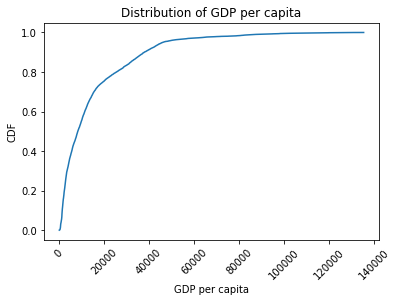

In [31]:
cdf_gdp.plot()
plt.xlabel('GDP per capita');
plt.ylabel('CDF');
plt.title('Distribution of GDP per capita');
plt.xticks(rotation=45);

In [33]:
q = 14926  # the mean from the summary statistics
p = cdf_gdp(q)
p

array(0.68487592)

From the CDF above, we can say that from the GDP per capita values presented in the data, about 68% of countries have a GDP per capita of the mean value, $14926 (2011 international dollars), or below.